## Import necessary packages

In [2]:
import librosa
from librosa import feature
import numpy as np
import pandas as pd

## Getting to know the features

y: timeseries
sr: sampling rate of y

In [3]:
y, sr = librosa.load('/home/regis/Desktop/Sound Project/files/valve/6_dB_valve/valve/id_00/abnormal/00000002.wav')
print(type(y),type(sr))
print(f'type y:{type(y)}  shape y: {y.shape}')
print(f'y:{y}')
print(f'type sr:{type(sr)}')
print(f'sr:{sr}')
S, phase = librosa.magphase(librosa.stft(y=y))
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
chroma_stft.shape

<class 'numpy.ndarray'> <class 'int'>
type y:<class 'numpy.ndarray'>  shape y: (220500,)
y:[-0.00595309 -0.01389602 -0.00044987 ...  0.00200642  0.00161118
  0.00065973]
type sr:<class 'int'>
sr:22050


(12, 431)

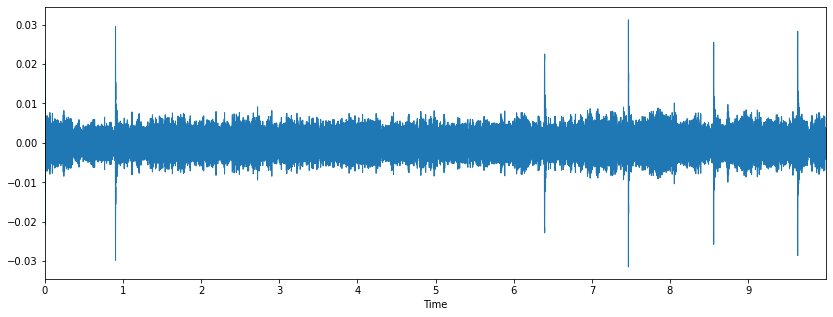

In [4]:
#display waveform
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr)

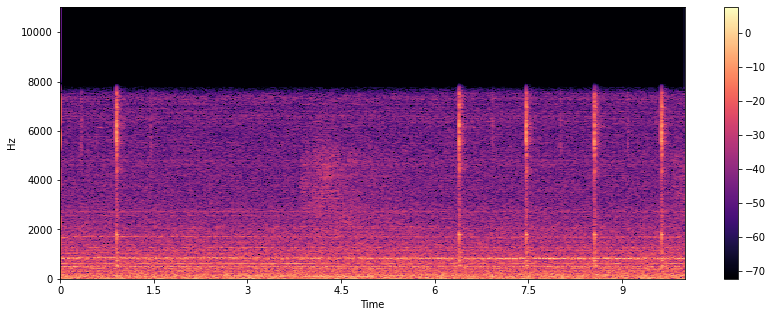

In [5]:
#display Spectrogram
Y = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(Y))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

## Getting to know the features normal

In [72]:
# loading the file, getting y and sr (sample rate)

y, sr = librosa.load('/home/regis/Desktop/Sound Project/files/valve/6_dB_valve/valve/id_00/normal/00000002.wav')

# Getting S and phase

S, phase = librosa.magphase(librosa.stft(y=y))

https://en.wikipedia.org/wiki/Chroma_feature probably not so usefull more for music

In [73]:
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)

In [74]:
chroma_stft

array([[0.72918993, 0.51056904, 0.3164483 , ..., 0.15484497, 0.11992054,
        0.22297028],
       [0.70047516, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.5120134 , 0.5690546 , 0.5120867 , ..., 0.6066545 , 0.58949757,
        0.54888386],
       ...,
       [0.48887953, 0.36247924, 0.23700967, ..., 0.17142375, 0.14125092,
        0.39781633],
       [0.6119907 , 0.5232362 , 0.39464715, ..., 0.48964646, 0.41985226,
        0.5496145 ],
       [0.6026557 , 0.50163674, 0.32398024, ..., 0.20934153, 0.14929068,
        0.24195233]], dtype=float32)

In [75]:
chroma_stft.sum()

1922.6375

In [76]:
chroma_stft.mean()

0.37173966

[Text(0.5, 1.0, 'Chromagram')]

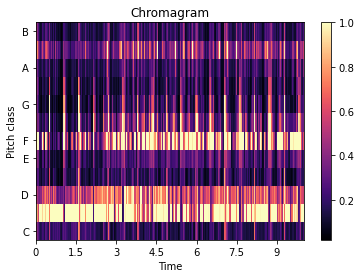

In [77]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')

In [78]:
rms = librosa.feature.rms(y=y, S=S)

In [79]:
rms

array([[0.00289874, 0.00278857, 0.00263363, 0.00241027, 0.00227719,
        0.0023183 , 0.00227294, 0.00227773, 0.00227701, 0.00221527,
        0.00211653, 0.00204748, 0.00192553, 0.0018566 , 0.001804  ,
        0.00179942, 0.00183828, 0.0019461 , 0.00205261, 0.0020455 ,
        0.00201203, 0.00262173, 0.0027532 , 0.00280806, 0.00286539,
        0.00233343, 0.0021327 , 0.0021308 , 0.00208211, 0.0021254 ,
        0.0021041 , 0.00210376, 0.00206422, 0.00197394, 0.00210557,
        0.00207971, 0.00223103, 0.00218157, 0.00216846, 0.00220909,
        0.00244306, 0.00257454, 0.00266861, 0.00269699, 0.00243846,
        0.00741323, 0.00749072, 0.00756826, 0.00759208, 0.00297239,
        0.00259086, 0.00239965, 0.00239447, 0.00231154, 0.00235448,
        0.00231605, 0.00224348, 0.00208628, 0.00207845, 0.00196942,
        0.00189468, 0.00201398, 0.00212099, 0.00219124, 0.00223684,
        0.0023207 , 0.00231851, 0.00226125, 0.00287674, 0.00294343,
        0.00303196, 0.00305201, 0.00253642, 0.00

In [80]:
rms.mean()

0.00268048

/home/regis/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/regis/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/regis/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


[Text(0.5, 1.0, 'log Power spectrogram')]

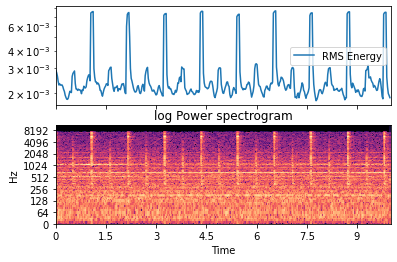

In [81]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

In [82]:
contrast = librosa.feature.spectral_contrast(S=S, sr=sr)

[Text(0, 0.5, 'Frequency bands'), Text(0.5, 1.0, 'Spectral contrast')]

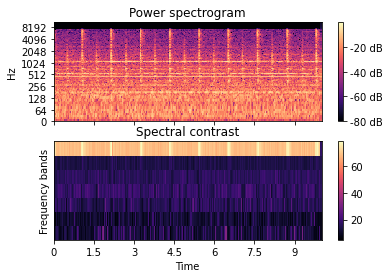

In [83]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                 ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img1, ax=[ax[0]], format='%+2.0f dB')
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
img2 = librosa.display.specshow(contrast, x_axis='time', ax=ax[1])
fig.colorbar(img2, ax=[ax[1]])
ax[1].set(ylabel='Frequency bands', title='Spectral contrast')

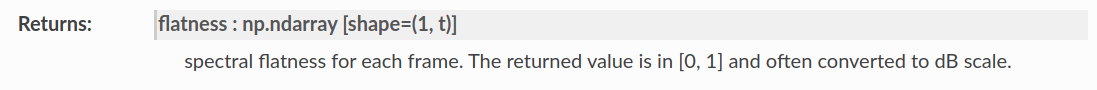

In [84]:
flatness = librosa.feature.spectral_flatness(y=y)
flatness

array([[0.01642964, 0.01522689, 0.00246595, 0.00187387, 0.00123318,
        0.00104436, 0.00076807, 0.00056742, 0.00054456, 0.00052365,
        0.00057395, 0.0006327 , 0.00065078, 0.00061759, 0.0007624 ,
        0.00084094, 0.00077151, 0.00065118, 0.00052747, 0.00052335,
        0.00062484, 0.0009986 , 0.000839  , 0.0006594 , 0.00052699,
        0.00060942, 0.00050637, 0.00052386, 0.00064775, 0.00060887,
        0.00056572, 0.00048866, 0.00056507, 0.00057496, 0.00059332,
        0.00052535, 0.00049901, 0.0004318 , 0.0005273 , 0.00053023,
        0.00042598, 0.00031551, 0.00031349, 0.00039973, 0.00038242,
        0.00300565, 0.00193142, 0.00216777, 0.0023886 , 0.00192728,
        0.00150936, 0.00132613, 0.00106751, 0.00060954, 0.00053092,
        0.00058598, 0.00057515, 0.00050657, 0.00060219, 0.00077384,
        0.00064715, 0.00061974, 0.0005825 , 0.00050831, 0.00048719,
        0.00055173, 0.00044172, 0.00039625, 0.00059086, 0.00072219,
        0.00062105, 0.00047984, 0.00046938, 0.00

In [85]:
flatness.mean()

0.0009500731

In [86]:
librosa.feature.spectral_flatness(S=S)

array([[0.01642964, 0.01522689, 0.00246595, 0.00187387, 0.00123318,
        0.00104436, 0.00076807, 0.00056742, 0.00054456, 0.00052365,
        0.00057395, 0.0006327 , 0.00065078, 0.00061759, 0.0007624 ,
        0.00084094, 0.00077151, 0.00065118, 0.00052747, 0.00052335,
        0.00062484, 0.0009986 , 0.000839  , 0.0006594 , 0.00052699,
        0.00060942, 0.00050637, 0.00052386, 0.00064775, 0.00060887,
        0.00056572, 0.00048866, 0.00056507, 0.00057496, 0.00059332,
        0.00052535, 0.00049901, 0.0004318 , 0.0005273 , 0.00053023,
        0.00042598, 0.00031551, 0.00031349, 0.00039973, 0.00038242,
        0.00300565, 0.00193142, 0.00216777, 0.0023886 , 0.00192728,
        0.00150936, 0.00132613, 0.00106751, 0.00060954, 0.00053092,
        0.00058598, 0.00057515, 0.00050657, 0.00060219, 0.00077384,
        0.00064715, 0.00061974, 0.0005825 , 0.00050831, 0.00048719,
        0.00055173, 0.00044172, 0.00039625, 0.00059086, 0.00072219,
        0.00062105, 0.00047984, 0.00046938, 0.00

In [87]:
S, phase = librosa.magphase(librosa.stft(y))
S_power = S ** 2
librosa.feature.spectral_flatness(S=S_power, power=1.0)

array([[0.01642964, 0.01522689, 0.00246595, 0.00187387, 0.00123318,
        0.00104436, 0.00076807, 0.00056742, 0.00054456, 0.00052365,
        0.00057395, 0.0006327 , 0.00065078, 0.00061759, 0.0007624 ,
        0.00084094, 0.00077151, 0.00065118, 0.00052747, 0.00052335,
        0.00062484, 0.0009986 , 0.000839  , 0.0006594 , 0.00052699,
        0.00060942, 0.00050637, 0.00052386, 0.00064775, 0.00060887,
        0.00056572, 0.00048866, 0.00056507, 0.00057496, 0.00059332,
        0.00052535, 0.00049901, 0.0004318 , 0.0005273 , 0.00053023,
        0.00042598, 0.00031551, 0.00031349, 0.00039973, 0.00038242,
        0.00300565, 0.00193142, 0.00216777, 0.0023886 , 0.00192728,
        0.00150936, 0.00132613, 0.00106751, 0.00060954, 0.00053092,
        0.00058598, 0.00057515, 0.00050657, 0.00060219, 0.00077384,
        0.00064715, 0.00061974, 0.0005825 , 0.00050831, 0.00048719,
        0.00055173, 0.00044172, 0.00039625, 0.00059086, 0.00072219,
        0.00062105, 0.00047984, 0.00046938, 0.00

In [88]:
zero_crossing=librosa.feature.zero_crossing_rate(y)

In [89]:
zero_crossing.mean()

0.0948024670098608

In [90]:
rolloff=librosa.feature.spectral_rolloff(y=y, sr=sr)
rolloff

array([[5824.73144531, 5781.66503906, 5695.53222656, 5264.86816406,
        4920.33691406, 4457.37304688, 3585.27832031, 3413.01269531,
        3057.71484375, 2906.98242188, 2874.68261719, 2820.84960938,
        2734.71679688, 2971.58203125, 3240.74707031, 3337.64648438,
        3046.94824219, 2906.98242188, 2767.01660156, 2756.25      ,
        2982.34863281, 3036.18164062, 3036.18164062, 2917.74902344,
        2659.35058594, 2777.78320312, 2723.95019531, 2745.48339844,
        2713.18359375, 2713.18359375, 2627.05078125, 2562.45117188,
        2605.51757812, 2745.48339844, 2734.71679688, 2680.88378906,
        2713.18359375, 2530.15136719, 2583.984375  , 2723.95019531,
        2756.25      , 2433.25195312, 2250.21972656, 2400.95214844,
        2390.18554688, 6341.52832031, 6395.36132812, 6384.59472656,
        5878.56445312, 5770.8984375 , 5544.79980469, 5006.46972656,
        4726.53808594, 3811.37695312, 3337.64648438, 3283.81347656,
        2993.11523438, 2659.35058594, 2777.78320

In [91]:
rolloff.mean()#default roll_percent=0.85

3394.926803128625

In [92]:
rolloffmax = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.99)
rolloffmax

array([[7493.5546875 , 7439.72167969, 7396.65527344, 7332.05566406,
        7288.98925781, 7192.08984375, 7170.55664062, 7170.55664062,
        7149.0234375 , 7127.49023438, 7202.85644531, 7310.52246094,
        7278.22265625, 7278.22265625, 7202.85644531, 7224.38964844,
        7213.62304688, 7170.55664062, 7181.32324219, 7149.0234375 ,
        7159.79003906, 7105.95703125, 7009.05761719, 7073.65722656,
        7138.25683594, 7202.85644531, 7159.79003906, 7181.32324219,
        7213.62304688, 7159.79003906, 7213.62304688, 7170.55664062,
        7159.79003906, 7159.79003906, 7127.49023438, 7116.72363281,
        7105.95703125, 7116.72363281, 7192.08984375, 7224.38964844,
        7213.62304688, 7149.0234375 , 7127.49023438, 7127.49023438,
        7105.95703125, 7461.25488281, 7482.78808594, 7482.78808594,
        7396.65527344, 7385.88867188, 7353.58886719, 7299.75585938,
        7245.92285156, 7149.0234375 , 7127.49023438, 7159.79003906,
        7149.0234375 , 7095.19042969, 7149.02343

In [93]:
rolloff_min = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.01)
rolloff_min

array([[ 43.06640625,  32.29980469,  21.53320312,  21.53320312,
         32.29980469,  32.29980469,  21.53320312,  21.53320312,
         21.53320312,  21.53320312,  21.53320312,  32.29980469,
         21.53320312,  32.29980469,  21.53320312,  21.53320312,
         21.53320312,  21.53320312,  32.29980469,  32.29980469,
         32.29980469,  43.06640625,  53.83300781,  43.06640625,
         43.06640625,  21.53320312,  21.53320312,  32.29980469,
         21.53320312,  32.29980469,  32.29980469,  21.53320312,
         21.53320312,  32.29980469,  32.29980469,  21.53320312,
         21.53320312,  21.53320312,  32.29980469,  32.29980469,
         32.29980469,  21.53320312,  21.53320312,  21.53320312,
         21.53320312,  32.29980469,  75.36621094,  64.59960938,
         53.83300781,  53.83300781,  43.06640625,  21.53320312,
         21.53320312,  21.53320312,  43.06640625,  43.06640625,
         32.29980469,  21.53320312,  21.53320312,  21.53320312,
         21.53320312,  32.29980469,  21.

[Text(0.5, 1.0, 'log Power spectrogram')]

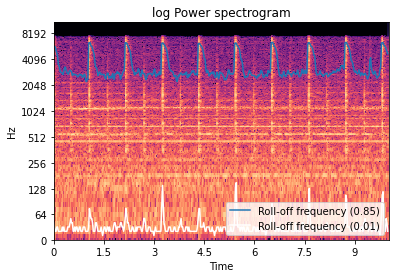

In [94]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(librosa.times_like(rolloff), rolloff[0], label='Roll-off frequency (0.85)')
ax.plot(librosa.times_like(rolloff), rolloff_min[0], color='w',
        label='Roll-off frequency (0.01)')
ax.legend(loc='lower right')
ax.set(title='log Power spectrogram')

In [95]:
p0 = librosa.feature.poly_features(S=S, order=0)

In [96]:
p1 = librosa.feature.poly_features(S=S, order=1)

In [97]:
p2 = librosa.feature.poly_features(S=S, order=2)

/home/regis/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/regis/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/regis/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


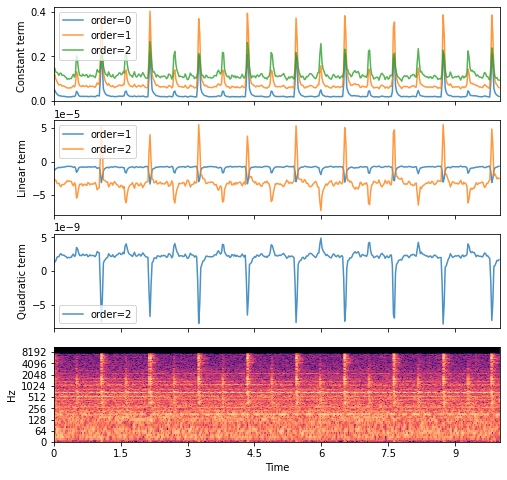

In [98]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=4, sharex=True, figsize=(8, 8))
times = librosa.times_like(p0)
ax[0].plot(times, p0[0], label='order=0', alpha=0.8)
ax[0].plot(times, p1[1], label='order=1', alpha=0.8)
ax[0].plot(times, p2[2], label='order=2', alpha=0.8)
ax[0].legend()
ax[0].label_outer()
ax[0].set(ylabel='Constant term ')
ax[1].plot(times, p1[0], label='order=1', alpha=0.8)
ax[1].plot(times, p2[1], label='order=2', alpha=0.8)
ax[1].set(ylabel='Linear term')
ax[1].label_outer()
ax[1].legend()
ax[2].plot(times, p2[0], label='order=2', alpha=0.8)
ax[2].set(ylabel='Quadratic term')
ax[2].legend()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[3])

In [100]:
hop_length = 512
oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr,
                                      hop_length=hop_length)

In [101]:
# Compute global onset autocorrelation
ac_global = librosa.autocorrelate(oenv, max_size=tempogram.shape[0])
ac_global = librosa.util.normalize(ac_global)
# Estimate the global tempo for display purposes
tempo = librosa.beat.tempo(onset_envelope=oenv, sr=sr,
                           hop_length=hop_length)[0]

/home/regis/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/regis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
/home/regis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


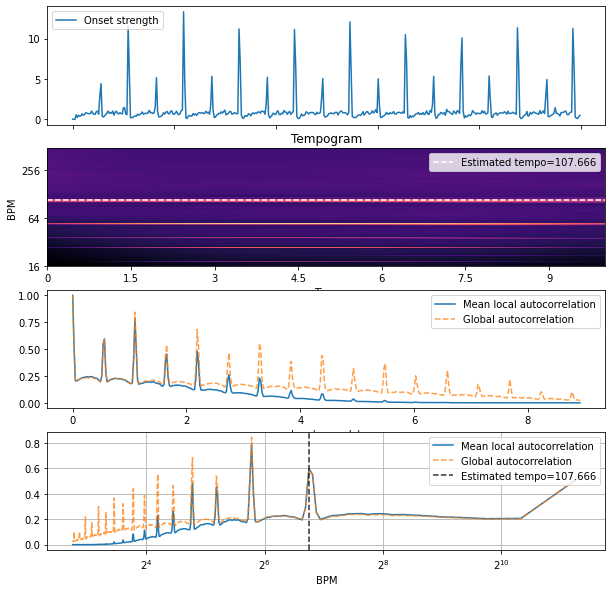

In [102]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=4, figsize=(10, 10))
times = librosa.times_like(oenv, sr=sr, hop_length=hop_length)
ax[0].plot(times, oenv, label='Onset strength')
ax[0].label_outer()
ax[0].legend(frameon=True)
librosa.display.specshow(tempogram, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='tempo', cmap='magma',
                         ax=ax[1])
ax[1].axhline(tempo, color='w', linestyle='--', alpha=1,
            label='Estimated tempo={:g}'.format(tempo))
ax[1].legend(loc='upper right')
ax[1].set(title='Tempogram')
x = np.linspace(0, tempogram.shape[0] * float(hop_length) / sr,
                num=tempogram.shape[0])
ax[2].plot(x, np.mean(tempogram, axis=1), label='Mean local autocorrelation')
ax[2].plot(x, ac_global, '--', alpha=0.75, label='Global autocorrelation')
ax[2].set(xlabel='Lag (seconds)')
ax[2].legend(frameon=True)
freqs = librosa.tempo_frequencies(tempogram.shape[0], hop_length=hop_length, sr=sr)
ax[3].semilogx(freqs[1:], np.mean(tempogram[1:], axis=1),
             label='Mean local autocorrelation', basex=2)
ax[3].semilogx(freqs[1:], ac_global[1:], '--', alpha=0.75,
             label='Global autocorrelation', basex=2)
ax[3].axvline(tempo, color='black', linestyle='--', alpha=.8,
            label='Estimated tempo={:g}'.format(tempo))
ax[3].legend(frameon=True)
ax[3].set(xlabel='BPM')
ax[3].grid(True)

## Getting to know the features abnormal

In [103]:
# loading the file, getting y and sr (sample rate)

y, sr = librosa.load('/home/regis/Desktop/Sound Project/files/valve/6_dB_valve/valve/id_00/abnormal/00000002.wav')

# Getting S and phase

S, phase = librosa.magphase(librosa.stft(y=y))

### Chroma_stft short time fourrier transform

In [104]:
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)

In [105]:
chroma_stft

array([[0.16869372, 0.10709886, 0.1009326 , ..., 0.13657835, 0.22391114,
        0.34599805],
       [0.12797336, 0.06201505, 0.03337644, ..., 0.05594896, 0.18902902,
        0.25011352],
       [0.17919466, 0.10657623, 0.05063796, ..., 0.06242579, 0.19036098,
        0.19081613],
       ...,
       [0.54526204, 0.46870044, 0.46184552, ..., 0.55206996, 0.397554  ,
        0.35663897],
       [0.10962305, 0.05814637, 0.02738066, ..., 0.04708209, 0.07015592,
        0.10732591],
       [0.15698558, 0.08419586, 0.05524642, ..., 0.05406127, 0.08845444,
        0.1904154 ]], dtype=float32)

In [106]:
chroma_stft.shape

(12, 431)

In [107]:
chroma_stft.sum()

1559.7926

In [108]:
chroma_stft.mean()

0.30158404

In [109]:
chroma_stft.max()

1.0

In [110]:
chroma_stft.min()

0.008542612

[Text(0.5, 1.0, 'Chromagram')]

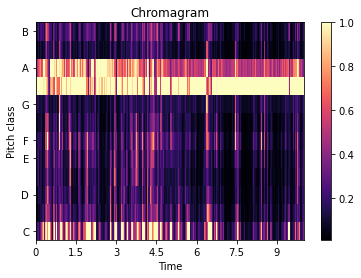

In [111]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')

In [112]:
rms = librosa.feature.rms(y=y, S=S)

In [113]:
rms

array([[0.00315259, 0.00332726, 0.00295122, 0.0024381 , 0.00251559,
        0.00220134, 0.00218382, 0.00228024, 0.00222952, 0.00245892,
        0.00251323, 0.00252251, 0.00253007, 0.00242612, 0.00222478,
        0.00209218, 0.0019467 , 0.00178244, 0.00180981, 0.00173286,
        0.00165664, 0.00164022, 0.00167722, 0.00172033, 0.00186451,
        0.00205566, 0.00208151, 0.0020776 , 0.00197382, 0.00179333,
        0.0017911 , 0.00181577, 0.00186196, 0.00184954, 0.00184659,
        0.00191683, 0.00179712, 0.002947  , 0.00318649, 0.00315849,
        0.00323163, 0.00218754, 0.00188893, 0.00194075, 0.00194488,
        0.00198932, 0.00205127, 0.00201371, 0.00200225, 0.00212092,
        0.00217633, 0.00220312, 0.00219391, 0.00202419, 0.00177794,
        0.00174977, 0.00187285, 0.0021069 , 0.00230756, 0.00234271,
        0.00228021, 0.0021524 , 0.00214917, 0.00233049, 0.00231306,
        0.00255253, 0.00262358, 0.00249737, 0.00254827, 0.00232468,
        0.00213889, 0.00213691, 0.00224224, 0.00

In [114]:
rms.mean()

0.0023434716

/home/regis/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/regis/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/regis/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


[Text(0.5, 1.0, 'log Power spectrogram')]

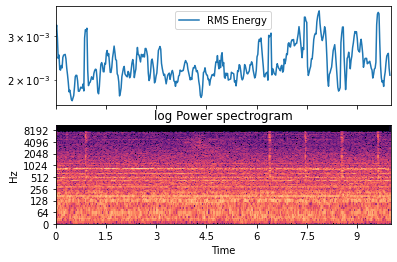

In [115]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

In [116]:
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
cent

array([[3996.49105626, 3306.65045953, 1334.83211035, 1323.72791988,
        1328.75657359, 1355.69412254, 1383.62472562, 1379.01578136,
        1358.87936728, 1367.59493262, 1323.17141173, 1347.86560833,
        1404.49566835, 1415.34700195, 1659.58925114, 1781.70681133,
        1588.9537316 , 1444.92476359, 1433.60293691, 1497.86596199,
        1568.11943847, 1539.28427238, 1482.08027938, 1501.1956064 ,
        1549.19504247, 1460.37059432, 1390.38339478, 1423.80500544,
        1476.04987435, 1480.29703773, 1493.68256232, 1453.22907091,
        1544.51987148, 1449.09091219, 1482.71335828, 1560.96709262,
        1440.49102614, 1903.77691477, 3909.90222423, 3887.1431219 ,
        3185.97642099, 2279.06605868, 1881.358453  , 1701.2093469 ,
        1592.20593228, 1509.93991794, 1461.6242298 , 1398.43123156,
        1364.06976426, 1454.43052784, 1434.80533237, 1376.84532065,
        1351.98373547, 1429.84222745, 1450.6841509 , 1470.44819526,
        1416.96283791, 1406.93559749, 1314.46804

In [117]:
freqs, times, D = librosa.reassigned_spectrogram(y, fill_nan=True)
librosa.feature.spectral_centroid(S=np.abs(D), freq=freqs)

array([[3996.60910989, 3306.70990391, 1334.70681944, 1323.79799605,
        1328.84396548, 1355.6582975 , 1383.4492539 , 1378.79956431,
        1359.11670365, 1367.49552694, 1323.15795925, 1347.7286908 ,
        1404.44021234, 1415.55223589, 1659.53084105, 1781.58893353,
        1588.99664556, 1444.92687814, 1433.5765246 , 1497.90300958,
        1567.89894356, 1539.34831781, 1482.1462579 , 1501.26022531,
        1549.19798945, 1460.50501509, 1390.23813507, 1423.74408584,
        1475.98595992, 1480.27910817, 1493.66603149, 1453.15069101,
        1544.46080185, 1448.97254303, 1482.69356951, 1561.06508108,
        1440.37287419, 1903.83032331, 3909.95734938, 3887.12334783,
        3186.08669505, 2279.32374231, 1881.31046925, 1701.10451659,
        1592.15575284, 1509.98821886, 1461.4623898 , 1398.61802825,
        1363.9758152 , 1454.56814464, 1434.79427728, 1376.59543197,
        1351.93432175, 1429.69595509, 1450.82424187, 1470.64282945,
        1416.95162563, 1406.89446309, 1314.36978

[Text(0.5, 1.0, 'log Power spectrogram')]

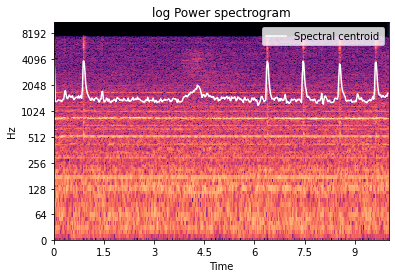

In [118]:
import matplotlib.pyplot as plt
times = librosa.times_like(cent)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

In [119]:
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
spec_bw

array([[2729.30282363, 2779.66639793, 1629.45542192, 1622.13748771,
        1652.73768244, 1696.24422878, 1720.76251519, 1744.6224183 ,
        1696.47344812, 1680.93889458, 1664.17811036, 1662.80839003,
        1704.53973692, 1705.93598312, 1990.95808101, 2065.28828821,
        1846.71051771, 1760.99721128, 1766.32939099, 1810.50544321,
        1834.46565592, 1817.23303491, 1805.32373975, 1783.08768769,
        1786.86962293, 1769.16732594, 1721.3611089 , 1769.24700545,
        1805.04508871, 1828.92815854, 1812.40445387, 1761.97087179,
        1810.53080803, 1791.4541196 , 1804.12808368, 1810.13454106,
        1795.71356458, 2168.3069491 , 2504.9918583 , 2490.20501258,
        2533.89290681, 2354.11489477, 2145.14868772, 1977.13150224,
        1871.12364208, 1807.51336754, 1798.76018922, 1783.25274416,
        1729.37364435, 1754.77112011, 1787.63598994, 1743.01927562,
        1706.62367785, 1778.13715154, 1805.93548521, 1811.42120459,
        1808.9784667 , 1777.04722215, 1705.07242

In [120]:
librosa.feature.spectral_bandwidth(S=S)

array([[2729.30282363, 2779.66639793, 1629.45542192, 1622.13748771,
        1652.73768244, 1696.24422878, 1720.76251519, 1744.6224183 ,
        1696.47344812, 1680.93889458, 1664.17811036, 1662.80839003,
        1704.53973692, 1705.93598312, 1990.95808101, 2065.28828821,
        1846.71051771, 1760.99721128, 1766.32939099, 1810.50544321,
        1834.46565592, 1817.23303491, 1805.32373975, 1783.08768769,
        1786.86962293, 1769.16732594, 1721.3611089 , 1769.24700545,
        1805.04508871, 1828.92815854, 1812.40445387, 1761.97087179,
        1810.53080803, 1791.4541196 , 1804.12808368, 1810.13454106,
        1795.71356458, 2168.3069491 , 2504.9918583 , 2490.20501258,
        2533.89290681, 2354.11489477, 2145.14868772, 1977.13150224,
        1871.12364208, 1807.51336754, 1798.76018922, 1783.25274416,
        1729.37364435, 1754.77112011, 1787.63598994, 1743.01927562,
        1706.62367785, 1778.13715154, 1805.93548521, 1811.42120459,
        1808.9784667 , 1777.04722215, 1705.07242

In [121]:
freqs, times, D = librosa.reassigned_spectrogram(y, fill_nan=True)
librosa.feature.spectral_bandwidth(S=np.abs(D), freq=freqs)

array([[2729.1534026 , 2779.58156109, 1629.4624842 , 1622.08404847,
        1652.71066486, 1696.19143212, 1720.85539017, 1744.69064155,
        1696.33634959, 1680.9967308 , 1664.22235061, 1662.84786061,
        1704.53119099, 1705.81607161, 1990.99291202, 2065.35549292,
        1846.61951252, 1760.99485467, 1766.30955981, 1810.4464459 ,
        1834.56407148, 1817.24781776, 1805.34446707, 1783.08634086,
        1786.82418644, 1769.08065437, 1721.37790452, 1769.2705073 ,
        1805.0576398 , 1828.91266768, 1812.41935759, 1761.96595162,
        1810.59748471, 1791.54342008, 1804.0765991 , 1810.08683976,
        1795.76465767, 2168.28365967, 2504.89585089, 2490.19614553,
        2533.81108027, 2354.04346023, 2145.14362507, 1977.1865744 ,
        1871.00800418, 1807.43003632, 1798.85420808, 1783.16813219,
        1729.38028665, 1754.65162707, 1787.57994843, 1743.09244669,
        1706.6704568 , 1778.21922138, 1805.86636404, 1811.30652537,
        1809.00459446, 1777.09806725, 1705.11144

/home/regis/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/regis/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/regis/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


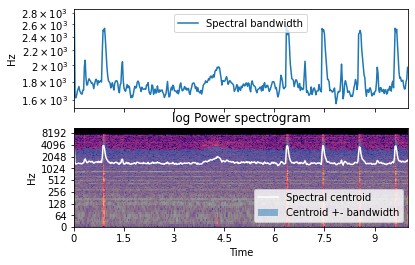

In [122]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw)
centroid = librosa.feature.spectral_centroid(S=S)
ax[0].semilogy(times, spec_bw[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
ax[1].fill_between(times, centroid[0] - spec_bw[0], centroid[0] + spec_bw[0],
                alpha=0.5, label='Centroid +- bandwidth')
ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
ax[1].legend(loc='lower right')

In [123]:
contrast = librosa.feature.spectral_contrast(S=S, sr=sr)

/home/regis/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/regis/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/regis/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


[Text(0, 0.5, 'Frequency bands'), Text(0.5, 1.0, 'Spectral contrast')]

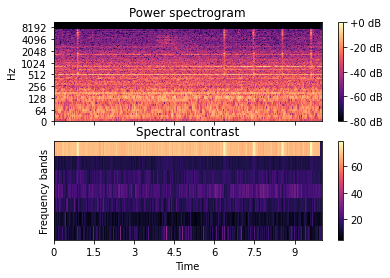

In [124]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                 ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img1, ax=[ax[0]], format='%+2.0f dB')
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
img2 = librosa.display.specshow(contrast, x_axis='time', ax=ax[1])
fig.colorbar(img2, ax=[ax[1]])
ax[1].set(ylabel='Frequency bands', title='Spectral contrast')

In [125]:
flatness = librosa.feature.spectral_flatness(y=y)
flatness

array([[0.05585376, 0.03975933, 0.00029762, 0.00034629, 0.00049287,
        0.0004566 , 0.00043866, 0.00050722, 0.00047229, 0.00043124,
        0.00030676, 0.00032335, 0.0004306 , 0.00041605, 0.00061583,
        0.00082684, 0.000891  , 0.00065442, 0.00060027, 0.00077359,
        0.00105182, 0.00088787, 0.00075073, 0.00073593, 0.0007832 ,
        0.00066007, 0.00040929, 0.00045882, 0.00074158, 0.00076472,
        0.00075078, 0.00069692, 0.00068099, 0.00059388, 0.0006493 ,
        0.0006885 , 0.00055615, 0.00119213, 0.00281974, 0.00239555,
        0.00224838, 0.00150338, 0.00119027, 0.00093269, 0.00067183,
        0.00063147, 0.00064732, 0.00051894, 0.00044789, 0.00057718,
        0.0005116 , 0.00042425, 0.00044086, 0.00062111, 0.00074342,
        0.00088908, 0.00072143, 0.00060614, 0.00039166, 0.00034274,
        0.00051608, 0.00051519, 0.00079603, 0.00064272, 0.00039733,
        0.00038681, 0.00036329, 0.00027925, 0.00038927, 0.0005    ,
        0.00045226, 0.00059684, 0.00051392, 0.00

In [126]:
flatness.mean()

0.0008350991

In [127]:
librosa.feature.spectral_flatness(S=S)

array([[0.05585376, 0.03975933, 0.00029762, 0.00034629, 0.00049287,
        0.0004566 , 0.00043866, 0.00050722, 0.00047229, 0.00043124,
        0.00030676, 0.00032335, 0.0004306 , 0.00041605, 0.00061583,
        0.00082684, 0.000891  , 0.00065442, 0.00060027, 0.00077359,
        0.00105182, 0.00088787, 0.00075073, 0.00073593, 0.0007832 ,
        0.00066007, 0.00040929, 0.00045882, 0.00074158, 0.00076472,
        0.00075078, 0.00069692, 0.00068099, 0.00059388, 0.0006493 ,
        0.0006885 , 0.00055615, 0.00119213, 0.00281974, 0.00239555,
        0.00224838, 0.00150338, 0.00119027, 0.00093269, 0.00067183,
        0.00063147, 0.00064732, 0.00051894, 0.00044789, 0.00057718,
        0.0005116 , 0.00042425, 0.00044086, 0.00062111, 0.00074342,
        0.00088908, 0.00072143, 0.00060614, 0.00039166, 0.00034274,
        0.00051608, 0.00051519, 0.00079603, 0.00064272, 0.00039733,
        0.00038681, 0.00036329, 0.00027925, 0.00038927, 0.0005    ,
        0.00045226, 0.00059684, 0.00051392, 0.00

In [128]:
S, phase = librosa.magphase(librosa.stft(y))
S_power = S ** 2
librosa.feature.spectral_flatness(S=S_power, power=1.0)

array([[0.05585376, 0.03975933, 0.00029762, 0.00034629, 0.00049287,
        0.0004566 , 0.00043866, 0.00050722, 0.00047229, 0.00043124,
        0.00030676, 0.00032335, 0.0004306 , 0.00041605, 0.00061583,
        0.00082684, 0.000891  , 0.00065442, 0.00060027, 0.00077359,
        0.00105182, 0.00088787, 0.00075073, 0.00073593, 0.0007832 ,
        0.00066007, 0.00040929, 0.00045882, 0.00074158, 0.00076472,
        0.00075078, 0.00069692, 0.00068099, 0.00059388, 0.0006493 ,
        0.0006885 , 0.00055615, 0.00119213, 0.00281974, 0.00239555,
        0.00224838, 0.00150338, 0.00119027, 0.00093269, 0.00067183,
        0.00063147, 0.00064732, 0.00051894, 0.00044789, 0.00057718,
        0.0005116 , 0.00042425, 0.00044086, 0.00062111, 0.00074342,
        0.00088908, 0.00072143, 0.00060614, 0.00039166, 0.00034274,
        0.00051608, 0.00051519, 0.00079603, 0.00064272, 0.00039733,
        0.00038681, 0.00036329, 0.00027925, 0.00038927, 0.0005    ,
        0.00045226, 0.00059684, 0.00051392, 0.00

In [129]:
zero_crossing=librosa.feature.zero_crossing_rate(y)

In [130]:
zero_crossing.mean()

0.075186249274942

In [131]:
rolloff=librosa.feature.spectral_rolloff(y=y, sr=sr)
rolloff

array([[6847.55859375, 6664.52636719, 2551.68457031, 2357.88574219,
        2540.91796875, 2605.51757812, 2799.31640625, 2842.3828125 ,
        2734.71679688, 2627.05078125, 2551.68457031, 2573.21777344,
        2777.78320312, 2810.08300781, 4037.47558594, 4618.87207031,
        3359.1796875 , 2928.515625  , 2982.34863281, 3294.58007812,
        3563.74511719, 3348.41308594, 3186.9140625 , 3154.61425781,
        3294.58007812, 3208.44726562, 2917.74902344, 3014.6484375 ,
        3208.44726562, 3337.64648438, 3380.71289062, 2982.34863281,
        3316.11328125, 3090.01464844, 3186.9140625 , 3477.61230469,
        3186.9140625 , 5221.80175781, 6438.42773438, 6438.42773438,
        6276.92871094, 5706.29882812, 4984.93652344, 4220.5078125 ,
        3617.578125  , 3208.44726562, 3154.61425781, 3025.41503906,
        2831.61621094, 3025.41503906, 3068.48144531, 2831.61621094,
        2756.25      , 3143.84765625, 3316.11328125, 3294.58007812,
        3197.68066406, 3090.01464844, 2702.41699

In [132]:
rolloff.mean()

3221.4621134534514

[Text(0.5, 1.0, 'log Power spectrogram')]

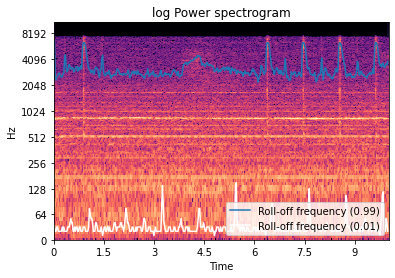

In [133]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(librosa.times_like(rolloff), rolloff[0], label='Roll-off frequency (0.99)')
ax.plot(librosa.times_like(rolloff), rolloff_min[0], color='w',
        label='Roll-off frequency (0.01)')
ax.legend(loc='lower right')
ax.set(title='log Power spectrogram')

In [134]:
p0 = librosa.feature.poly_features(S=S, order=0)

In [135]:
p1 = librosa.feature.poly_features(S=S, order=1)

In [136]:
p2 = librosa.feature.poly_features(S=S, order=2)

In [137]:
p5 = librosa.feature.poly_features(S=S, order=5)

/home/regis/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/regis/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/regis/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


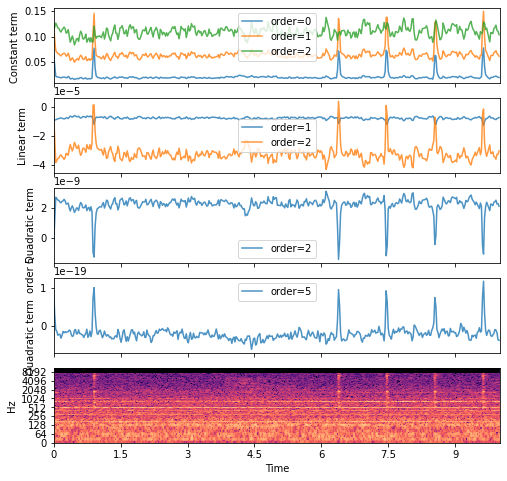

In [138]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=5, sharex=True, figsize=(8, 8))
times = librosa.times_like(p0)
ax[0].plot(times, p0[0], label='order=0', alpha=0.8)
ax[0].plot(times, p1[1], label='order=1', alpha=0.8)
ax[0].plot(times, p2[2], label='order=2', alpha=0.8)
ax[0].legend()
ax[0].label_outer()
ax[0].set(ylabel='Constant term ')
ax[1].plot(times, p1[0], label='order=1', alpha=0.8)
ax[1].plot(times, p2[1], label='order=2', alpha=0.8)
ax[1].set(ylabel='Linear term')
ax[1].label_outer()
ax[1].legend()
ax[2].plot(times, p2[0], label='order=2', alpha=0.8)
ax[2].set(ylabel='Quadratic term')
ax[2].legend()
ax[3].plot(times, p5[0], label='order=5', alpha=0.8)
ax[3].set(ylabel='Quadratic term  order 5')
ax[3].legend()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[4])

/home/regis/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/regis/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/regis/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


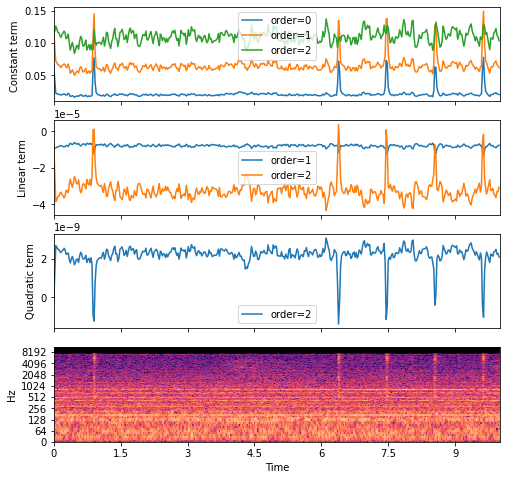

In [139]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=4, sharex=True, figsize=(8, 8))
times = librosa.times_like(p0)
ax[0].plot(times, p0[0], label='order=0')
ax[0].plot(times, p1[1], label='order=1')
ax[0].plot(times, p2[2], label='order=2')
ax[0].legend()
ax[0].label_outer()
ax[0].set(ylabel='Constant term ')
ax[1].plot(times, p1[0], label='order=1')
ax[1].plot(times, p2[1], label='order=2')
ax[1].set(ylabel='Linear term')
ax[1].label_outer()
ax[1].legend()
ax[2].plot(times, p2[0], label='order=2')
ax[2].set(ylabel='Quadratic term')
ax[2].legend()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[3])

In [140]:
hop_length = 512
oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr,
                                      hop_length=hop_length)
# Compute global onset autocorrelation
ac_global = librosa.autocorrelate(oenv, max_size=tempogram.shape[0])
ac_global = librosa.util.normalize(ac_global)
# Estimate the global tempo for display purposes
tempo = librosa.beat.tempo(onset_envelope=oenv, sr=sr,
                           hop_length=hop_length)[0]

/home/regis/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/regis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
/home/regis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


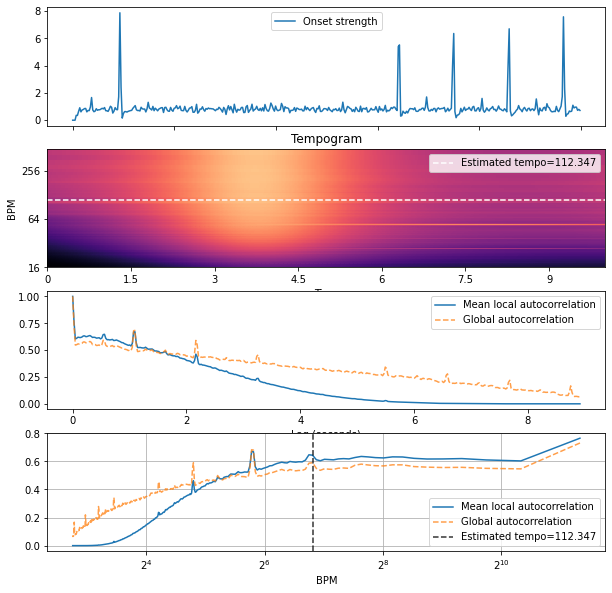

In [141]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=4, figsize=(10, 10))
times = librosa.times_like(oenv, sr=sr, hop_length=hop_length)
ax[0].plot(times, oenv, label='Onset strength')
ax[0].label_outer()
ax[0].legend(frameon=True)
librosa.display.specshow(tempogram, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='tempo', cmap='magma',
                         ax=ax[1])
ax[1].axhline(tempo, color='w', linestyle='--', alpha=1,
            label='Estimated tempo={:g}'.format(tempo))
ax[1].legend(loc='upper right')
ax[1].set(title='Tempogram')
x = np.linspace(0, tempogram.shape[0] * float(hop_length) / sr,
                num=tempogram.shape[0])
ax[2].plot(x, np.mean(tempogram, axis=1), label='Mean local autocorrelation')
ax[2].plot(x, ac_global, '--', alpha=0.75, label='Global autocorrelation')
ax[2].set(xlabel='Lag (seconds)')
ax[2].legend(frameon=True)
freqs = librosa.tempo_frequencies(tempogram.shape[0], hop_length=hop_length, sr=sr)
ax[3].semilogx(freqs[1:], np.mean(tempogram[1:], axis=1),
             label='Mean local autocorrelation', basex=2)
ax[3].semilogx(freqs[1:], ac_global[1:], '--', alpha=0.75,
             label='Global autocorrelation', basex=2)
ax[3].axvline(tempo, color='black', linestyle='--', alpha=.8,
            label='Estimated tempo={:g}'.format(tempo))
ax[3].legend(frameon=True)
ax[3].set(xlabel='BPM')
ax[3].grid(True)

## Function extract_features from wav-file 

In [4]:
def extract_features(file):

    # loading the file, getting y and sr (sample rate)

    y, sr = librosa.load(file)

    # Getting S and phase

    S, phase = librosa.magphase(librosa.stft(y=y))

    # Features for the DataFrame
# chroma features have pitch which is probably not usefull
    chroma_stft = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))

    chroma_cqt = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr))

    chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr))
# to do
    melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, S=S))
# to check This feature is one of the most important method to extract a feature of an audio signal and is 
#used majorly whenever working on audio signals. The mel frequency cepstral coefficients (MFCCs) of a signal 
#are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral 
#envelope.

    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr))
#rms when plotted similarities with melspectorgram
#normal rms mean higher than abnormal?
    rms = np.mean(librosa.feature.rms(y=y, S=S))
#spectral centroid computes weighted mean of the frequencies in the sound
#plot is line on melspectogram
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr, S=S))
#Bandwidth(blue zone) is the difference between the upper and lower frequencies in a continuous band of frequencies
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr, S=S))
#needs further investigation, but makes continous data discrete in bins
    spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr, S=S))
#Spectral flatness (or tonality coefficient) is a measure to quantify how much noise-like a sound is, as opposed to
#being tone-like 1. A high spectral flatness (closer to 1.0) indicates the spectrum is similar to white noise. 
#It is often converted to decibel.
    spectral_flatness = np.mean(librosa.feature.spectral_flatness(y=y, S=S))
#The roll-off frequency is defined for each frame as the center frequency for a spectrogram bin such that at 
#least roll_percent (0.85 by default) of the energy of the spectrum in this frame is contained in this bin and 
#he bins below. This can be used to, e.g., approximate the maximum (or minimum) frequency by setting roll_percent 
#to a value close to 1 (or 0).
#rolloff with rolloff coefficient 0.01 seems to be the same for (ab)normal
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr, S=S))
#Get coefficients of fitting an nth-order polynomial to the columns of a spectrogram
    poly_features = np.mean(librosa.feature.poly_features(y=y, sr=sr, S=S))
#probably chroma
    tonnetz = np.mean(librosa.feature.tonnetz(y=y, sr=sr))
#normal has higher zero crossing rate?
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=y))
#divide in frequency bands could give more information bout difference normal and abnormal (BPM)
tempo = librosa.beat.tempo(onset_envelope=oenv, sr=sr,
                           hop_length=hop_length)[0]
    # putting them into a dataframe

    return pd.DataFrame({'chroma_stft': [chroma_stft], 'chroma_cqt': [chroma_cqt], 'chroma_cens' : [chroma_cens], 
                                 'melspectrogram' : [melspectrogram], 'mfcc' : [mfcc], 'rms' : [rms],
                            'spectral_centroid' : [spectral_centroid], 'spectral_bandwidth' : [spectral_bandwidth],
                            'spectral_contrast' : [spectral_contrast], 'spectral_flatness ' : [spectral_flatness],
                            'spectral_rolloff' : [spectral_rolloff], 'poly_features' : [poly_features], 
                                 'tonnetz' : [tonnetz], 'zero_crossing_rate' : [zero_crossing_rate]})

In [17]:
import os
import sys
import time
mdir='/home/regis/Desktop/Sound Project/files/'
folders=[]
folders_lvl1=[]
folders_lvl2=[]
for folder in os.listdir(mdir):
    path = f"{mdir}{folder}"
    folders.append(path)
folders.sort()
for i in folders:
    for folder in os.listdir(i):
        path = f"{i}{folder}"
        folders_lvl1.append(path)
    folders_lvl1.sort()
    
    #print(folders_lvl1)

#for filename in os.listdir(directory_normal_6):
#    path = f"{mdir}{folder}"

['/home/regis/Desktop/Sound Project/files/fan-6_dB_fan', '/home/regis/Desktop/Sound Project/files/fan0_dB_fan', '/home/regis/Desktop/Sound Project/files/fan6_dB_fan']
['/home/regis/Desktop/Sound Project/files/fan-6_dB_fan', '/home/regis/Desktop/Sound Project/files/fan0_dB_fan', '/home/regis/Desktop/Sound Project/files/fan6_dB_fan', '/home/regis/Desktop/Sound Project/files/valve-6_dB_valve', '/home/regis/Desktop/Sound Project/files/valve0_dB_valve', '/home/regis/Desktop/Sound Project/files/valve6_dB_valve']


In [20]:
import os
import sys
import time
# start measuring excecution time
start_time = time.time()
#create empty list that will be filled with pathnames
list_normal_6 = []
directory_normal_6 = "/home/regis/Desktop/Sound Project/files/valve/6_dB_valve/valve/id_00/normal/"

for filename in os.listdir(directory_normal_6):
    file = f"{directory_normal_6}{filename}"
    list_normal_6.append(file)
list_normal_6.sort()
for wav_file in list_normal_6[:30]:
    df = extract_features(wav_file)
    print(wav_file)
    if wav_file == list_normal_6[0]:
        df.to_csv('Librosa_features.csv')
        print(df)
    else:
        print(df)
        df.to_csv('Librosa_features.csv', mode='a', header=False)
print("--- %s seconds ---" % (time.time() - start_time))

/home/regis/Desktop/Sound Project/files/valve/6_dB_valve/valve/id_00/normal/00000000.wav
   chroma_stft  chroma_cqt  chroma_cens  melspectrogram       mfcc       rms  \
0      0.51952    0.649686     0.276866          0.0063 -15.342528  0.002967   

   spectral_centroid  spectral_bandwidth  spectral_contrast  \
0        1399.372425         1635.526256          21.795884   

   spectral_flatness   spectral_rolloff  poly_features   tonnetz  \
0            0.000852        2847.10413       0.043392 -0.012394   

   zero_crossing_rate  
0            0.060725  
/home/regis/Desktop/Sound Project/files/valve/6_dB_valve/valve/id_00/normal/00000001.wav
   chroma_stft  chroma_cqt  chroma_cens  melspectrogram       mfcc      rms  \
0     0.562396    0.706519     0.280007        0.007236 -14.877153  0.00292   

   spectral_centroid  spectral_bandwidth  spectral_contrast  \
0        1765.622412         1767.165689          21.547031   

   spectral_flatness   spectral_rolloff  poly_features   tonnet

/home/regis/Desktop/Sound Project/files/valve/6_dB_valve/valve/id_00/normal/00000015.wav
   chroma_stft  chroma_cqt  chroma_cens  melspectrogram       mfcc       rms  \
0      0.28085    0.650657     0.278735        0.005889 -17.008205  0.002761   

   spectral_centroid  spectral_bandwidth  spectral_contrast  \
0        1727.042687         1815.283148          23.393934   

   spectral_flatness   spectral_rolloff  poly_features   tonnetz  \
0            0.000894       3481.534245       0.040227 -0.004596   

   zero_crossing_rate  
0            0.091113  
/home/regis/Desktop/Sound Project/files/valve/6_dB_valve/valve/id_00/normal/00000016.wav
   chroma_stft  chroma_cqt  chroma_cens  melspectrogram       mfcc       rms  \
0     0.298888    0.604312     0.274726        0.006272 -16.362789  0.002821   

   spectral_centroid  spectral_bandwidth  spectral_contrast  \
0        1733.124232          1848.45535          23.323509   

   spectral_flatness   spectral_rolloff  poly_features   tonn